In [ ]:
!pip install -q langchain_community
!pip install -q replicate


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.5/2.5 MB 28.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 45.2/45.2 kB 3.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.9/50.9 kB 3.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 48.6/48.6 kB 2.0 MB/s eta 0:00:00


In [ ]:
import os
import pandas as pd
import matplotlib.pyplot as plt
from langchain_community.llms import Replicate
from google.colab import userdata
# Set the API token
api_token = userdata.get('api_token')
os.environ["REPLICATE_API_TOKEN"] = api_token
# Model setup
model = "ibm-granite/granite-3.2-8b-instruct"
output = Replicate(
model=model,
replicate_api_token=api_token,
)

In [8]:
# Define the customer reviews
customer_reviews = [
    "The battery lasts all day, I am very satisfied!",
    "This phone crashes often and is very slow.",
    "I love the screen colors, but it's too dim outdoors.",
    "The camera quality is amazing for the price.",
    "Performance is inconsistent, sometimes smooth, sometimes laggy.",
    "Battery drains quickly when gaming.",
    "The design is sleek and modern.",
    "The screen resolution is great, very clear!",
    "Too many bugs after the last update.",
    "I am happy with the overall performance."
]
reviews_text = "\n".join([f"Review {i+1}: {review}" for i, review in enumerate(customer_reviews)])
prompt = f"""
Classify these reviews as Positive, Negative, or Mixed:
{reviews_text}
"""
response = output.invoke(prompt)
print("Granite Model Response:\n")
print(response)

Granite Model Response:

1. Positive - The review expresses satisfaction with the battery life.
2. Negative - The review criticizes the phone's performance and reliability.
3. Mixed - While praising the screen colors, the review also points out a significant flaw (dimness outdoors).
4. Positive - The review highlights the camera's quality as a positive aspect.
5. Negative - The review describes inconsistent performance, implying dissatisfaction.
6. Negative - The review points out a significant drawback (quick battery drain during gaming).
7. Positive - The review compliments the phone's design.
8. Positive - The review praises the screen resolution for being clear.
9. Negative - The review mentions issues post-update, indicating dissatisfaction.
10. Positive - The review conveys overall satisfaction with the phone's performance.


In [10]:

results = []
for review in customer_reviews:
    prompt = f"Classify this review as Positive, Negative, or Mixed and tag the main aspect (Battery, Screen, Performance, Camera, Design, Software). Review: {review}"
    response = output.invoke(prompt)
    results.append({"review": review, "classification": response})

df = pd.DataFrame(results)
df.head()

,review,classification
0,"The battery lasts all day, I am very satisfied!","Positive, Battery. The review expresses satisf..."
1,This phone crashes often and is very slow.,"Negative, Performance\n\nThe review expresses ..."
2,"I love the screen colors, but it's too dim out...","The review can be classified as ""Mixed"" with t..."
3,The camera quality is amazing for the price.,"Positive, Camera"
4,"Performance is inconsistent, sometimes smooth,...",The review can be classified as Mixed and the ...


Distribusi Sentiment:
sentiment
Positive    6
Negative    3
Mixed       1
Name: count, dtype: int64 

Distribusi Aspek:
aspect
Performance    3
Battery        2
Screen         2
Camera         1
Design         1
Software       1
Name: count, dtype: int64 



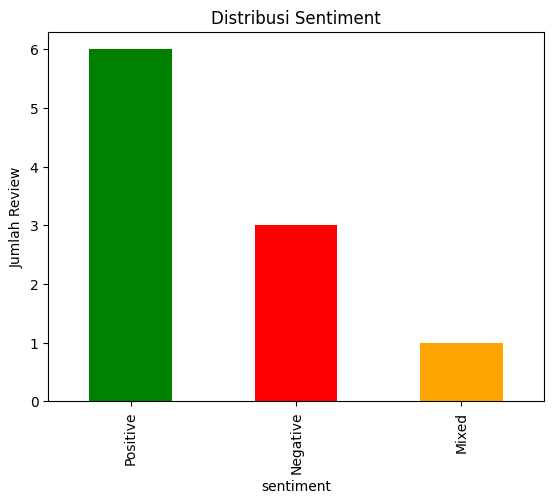

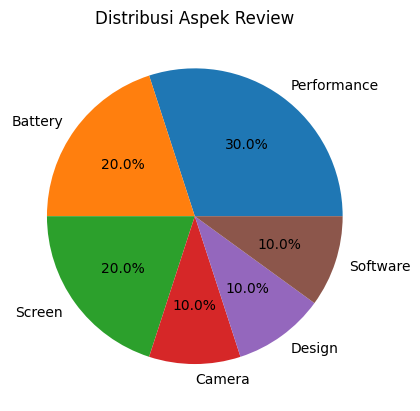

In [14]:
import re

# Ekstrak Sentiment (Positive, Negative, Mixed)
def extract_sentiment(text):
    if re.search(r"\b[Pp]ositive\b", text):
        return "Positive"
    elif re.search(r"\b[Nn]egative\b", text):
        return "Negative"
    elif re.search(r"\b[Mm]ixed\b", text):
        return "Mixed"
    return "Unknown"

# Ekstrak Aspek (Battery, Screen, Performance, Camera, Design, Software)
def extract_aspect(text):
    aspects = ["Battery", "Screen", "Performance", "Camera", "Design", "Software"]
    for asp in aspects:
        if re.search(asp, text, re.IGNORECASE):
            return asp
    return "Unknown"

df['sentiment'] = df['classification'].apply(extract_sentiment)
df['aspect'] = df['classification'].apply(extract_aspect)

# Statistik
print("Distribusi Sentiment:")
print(df['sentiment'].value_counts(), "\n")

print("Distribusi Aspek:")
print(df['aspect'].value_counts(), "\n")

# Grafik Sentiment
df['sentiment'].value_counts().plot(
    kind='bar',
    color=["green", "red", "orange"],
    title="Distribusi Sentiment"
)
plt.ylabel("Jumlah Review")
plt.show()

# Grafik Aspek
df['aspect'].value_counts().plot(
    kind='pie',
    autopct='%1.1f%%',
    title="Distribusi Aspek Review"
)
plt.ylabel("")
plt.show()


In [12]:
parameters = {
"top_k": 6,
"top_p": 1.0,
"max_tokens": 256,
"min_tokens": 0,
"random_seed": None,
"repetition_penalty": 1.0,
"stopping_criteria": "length (256 tokens)",
"stopping_sequence": None
}

In [13]:
# Add initial prompt
refined_prompt = f""":
Classify these reviews as positive, negative, or mixed, and tag
relevant focus areas such as battery life, screen quality, or
performance
{reviews_text}
"""
# Invoke the model
response = output.invoke(refined_prompt, parameters=parameters)
# Print the response
print("Granite Model Refined Response:\n")
print(response)

Granite Model Refined Response:

1. Positive - Battery life
2. Negative - Performance, Stability
3. Mixed - Screen quality (color, brightness)
4. Positive - Camera quality
5. Negative - Performance
6. Negative - Battery life (gaming)
7. Positive - Design
8. Positive - Screen quality (resolution)
9. Negative - Software/Updates
10. Positive - Overall performance
